In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

data = pd.read_csv('B:/analisis de datos/archive/avocado.csv')

print(data.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [3]:
umbral = 1.2

data['PriceCategory'] = np.where(data['AveragePrice'] > umbral, 1, 0)



In [4]:
X = data[['year', 'AveragePrice']]

# Variable objetivo
y = data['PriceCategory']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression

# creacion regresion
model = LogisticRegression()

# entrenamiento de modelo con .fit
model.fit(X_train, y_train)


LogisticRegression()

Matriz de confusión:
[[1261    0]
 [   0 2389]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1261
           1       1.00      1.00      1.00      2389

    accuracy                           1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650



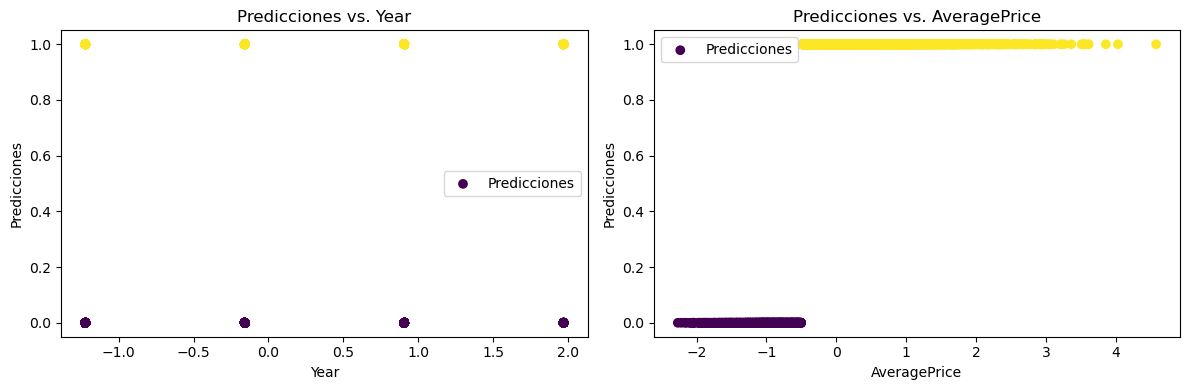

In [14]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcula la matriz de confusión y muestra el informe de clasificación
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Matriz de confusión:")
print(confusion)
print("\nInforme de clasificación:")
print(classification_rep)

# creacion graficas
plt.figure(figsize=(12, 4))

# Gráfica 1
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], y_pred, c=y_pred, cmap='viridis', label='Predicciones')
plt.xlabel('Year')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Year')
plt.legend()

# Gráfica 2
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 1], y_pred, c=y_pred, cmap='viridis', label='Predicciones')
plt.xlabel('AveragePrice')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. AveragePrice')
plt.legend()

plt.tight_layout()  # Ajusta el espacio entre las gráficas para evitar solapamientos
plt.show()

